## Additional Usage

### Data Imputation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(20,1))
df = df.where(df<0.5)
df

,0
0,-0.316341
1,-0.948953
2,NaN
3,-1.550329
4,-0.374720
5,NaN
6,NaN
7,NaN
8,0.248640
9,NaN


In [2]:
df.interpolate(axis=0)

,0
0,-0.316341
1,-0.948953
2,-1.249641
3,-1.550329
4,-0.374720
5,-0.218880
6,-0.063040
7,0.092800
8,0.248640
9,0.011411


<AxesSubplot:>

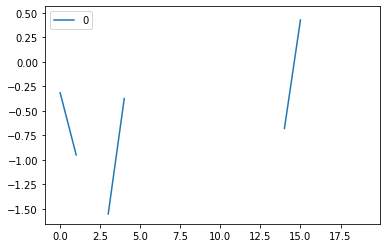

In [3]:
df.plot()

<AxesSubplot:>

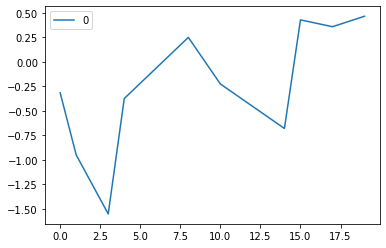

In [4]:
df.interpolate().plot()

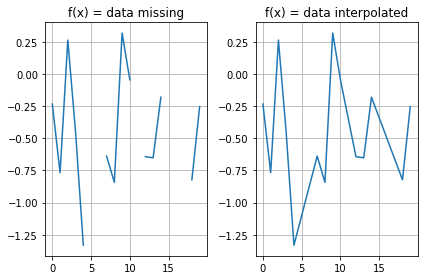

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(20,1))
df = df.where(df<0.5)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(df)
ax1.set_title('f(x) = data missing')
ax1.grid()

ax2.plot(df.interpolate())
ax2.set_title('f(x) = data interpolated')
ax2.grid()

fig.tight_layout()
plt.show()

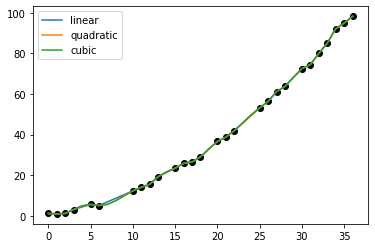

In [6]:
ser = pd.Series(np.arange(1, 10.1, .25)**2 + np.random.randn(37))
bad = np.array([4, 7, 8, 9, 14, 19, 23, 24, 29])
ser[bad] = np.nan
methods = ['linear', 'quadratic', 'cubic']
df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})
df.plot()
for i in range(df.shape[0]):
    if i not in bad:
        plt.scatter(i, ser[i], c='k')

### Animation

1. Create the figure and plot the basic objects with initial data. These could be dummy/empty. 

2. Write an update method which takes a frame number as argument (along with other optonal data parameters), and updates the plot elements with new data 

3. Call FuncAnimation with the update method as argument, with any other optional arguments that need to be passed to it.


Methods to update each type of plot:

- scatter plot: set_offsets()
- line plot: set_data()
- image: set_array(). Note that imshow() must be initially called with (animated=True)
- other attributes such as color, size, etc. can also be updated, e.g. set_edgecolors(), set_sizes()

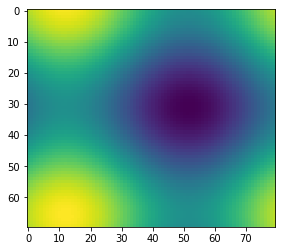

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import animation

fig = plt.figure()

def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 80)
y = np.linspace(0, 2 * np.pi, 70).reshape(-1, 1)

im = plt.imshow(f(x, y), animated=True)


def updatefig(*args):
    global x, y
    x += np.pi / 5.
    y += np.pi / 10.
    im.set_array(f(x, y))
    return im,

ani = animation.FuncAnimation(
    fig, updatefig, interval=100, blit=True)
plt.show()

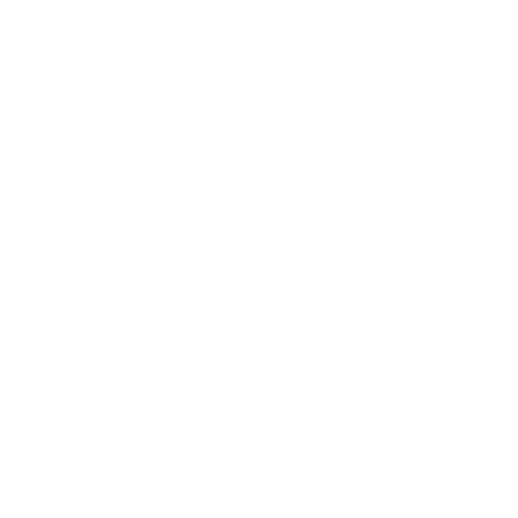

In [8]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

#%matplotlib notebook
"""
===============
Rain simulation
===============
Simulates rain drops on a surface by animating the scale and opacity
of 50 scatter points.
Author: Nicolas P. Rougier
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create new Figure and an Axes which fills it.
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(0, 1), ax.set_xticks([])
ax.set_ylim(0, 1), ax.set_yticks([])

# Create rain data
n_drops = 50
rain_drops = np.zeros(n_drops, dtype=[('position', float, 2),
                                      ('size',     float, 1),
                                      ('growth',   float, 1),
                                      ('color',    float, 4)])

# Initialize the raindrops in random positions and with
# random growth rates.
rain_drops['position'] = np.random.uniform(0, 1, (n_drops, 2))
rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

# Construct the scatter which we will update during animation
# as the raindrops develop.
scat = ax.scatter(rain_drops['position'][:, 0], rain_drops['position'][:, 1],
                  s=rain_drops['size'], lw=0.5, edgecolors=rain_drops['color'],
                  facecolors='none')


def update(frame_number):
    # Get an index which we can use to re-spawn the oldest raindrop.
    current_index = frame_number % n_drops

    # Make all colors more transparent as time progresses.
    rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
    rain_drops['color'][:, 3] = np.clip(rain_drops['color'][:, 3], 0, 1)

    # Make all circles bigger.
    rain_drops['size'] += rain_drops['growth']

    # Pick a new position for oldest rain drop, resetting its size,
    # color and growth factor.
    rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
    rain_drops['size'][current_index] = 5
    rain_drops['color'][current_index] = (0, 0, 0, 1)
    rain_drops['growth'][current_index] = np.random.uniform(50, 200)

    # Update the scatter collection, with the new colors, sizes and positions.
    scat.set_edgecolors(rain_drops['color'])
    scat.set_sizes(rain_drops['size'])
    scat.set_offsets(rain_drops['position'])


# Construct the animation, using the update function as the animation
# director.
animation = FuncAnimation(fig, update, interval=10, frames=range(100), repeat=0)
plt.show()

### 3-D Plotting

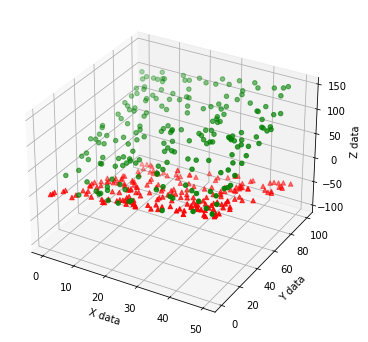

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def randrange(n, vmin, vmax):
     return (vmax-vmin)*np.random.rand(n) + vmin

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
n = 200
for c, m, zl in [('g', 'o', +1), ('r', '^', -1)]:
    xs = randrange(n, 0, 50)
    ys = randrange(n, 0, 100)
    zs = xs+zl*ys  
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X data')
ax.set_ylabel('Y data')
ax.set_zlabel('Z data')
plt.show()